In [66]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [67]:
df = pd.read_csv('quikr_car.csv')

In [68]:
df.sample(5)

,name,company,year,Price,kms_driven,fuel_type
239,Honda Jazz VX MT,Honda,2016,"4,50,000","41,000 kms",Petrol
549,Chevrolet Beat PS Diesel,Chevrolet,2012,"2,15,000","65,422 kms",Diesel
124,Chevrolet Spark,Chevrolet,2012,"1,58,400","33,600 kms",Petrol
701,Tata Indigo CS GLS,Tata,2017,"2,70,000","50,000 kms",Diesel
560,Hyun,Hyundai,Eon,Ask For Price,NaN,NaN


In [69]:
df.shape

(892, 6)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [71]:
# LEt's create backup copy
backup  = df.copy()


## data information 
- names are little inconsistent 
- In names column company names are also involved 
- some company names are not actually company names 
- year has many non-year value 
- year is in object we have to change it in integer 
- price has (ask for price) in it 
- price is in object and aslo contain commas in its prices
- fuel_type has nan values in it 

In [72]:
# year has many non-year values
df = df[df['year'].str.isnumeric()]

In [73]:
df['year']

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
886    2009
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 842, dtype: object

In [74]:
# year is in object. we will change that in int
df['year'] = df['year'].astype(int)

In [75]:
# price has ask for value
df = df[df['Price']!= 'Ask For Price']

In [76]:
# price has commas in its prices and is in object
df['Price'] = df['Price'].str.replace(',','').astype(int)

In [77]:
# Convert 'kms_driven' column to string and then apply .str methods
df['kms_driven'] = df['kms_driven'].astype(str).str.split().str.get(0).str.replace(',', '')

In [78]:
df['kms_driven']

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
886    132000
888     27000
889     40000
890    Petrol
891    Petrol
Name: kms_driven, Length: 819, dtype: object

In [79]:
# as we can see that we have 2 string value in kms_driven 
df= df[df['kms_driven'].str.isnumeric()]

In [80]:
# now we can change the data type
df['kms_driven']=df['kms_driven'].astype(int)

### fuel_type has nan values

In [82]:
df=df[~df['fuel_type'].isna()]

In [83]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

In [84]:
df.shape

(816, 6)

### Company  does not need any cleaning now. changing car names. keeping only the first three words

In [87]:
df['name']= df['name'].str.split().str.slice(start=0,stop =3).str.join(' ') 

In [93]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [91]:
# as we can see the index problem so we have to readjust the index
df=df.reset_index(drop=True)

In [94]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [97]:
# let's import our cleaning data at safe place 
df.to_csv('cleaned_car_dataset')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [99]:
df.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [100]:
df=df[df['Price']<6000000]

In [101]:
df.describe()

,year,Price,kms_driven
count,815.000000,8.150000e+02,815.000000
mean,2012.442945,4.017933e+05,46277.096933
std,4.005079,3.815888e+05,34318.459638
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56879.000000
max,2019.000000,3.100000e+06,400000.000000


# will work with relationship of columns 

In [102]:
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [103]:
import seaborn as sns

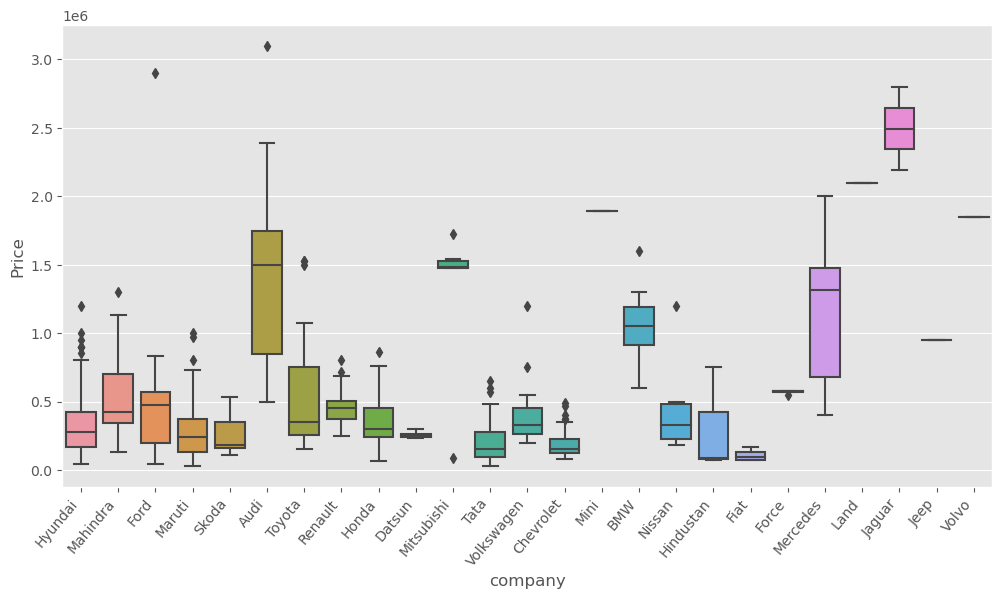

In [110]:
# relation of company with price
plt.subplots(figsize=(12,6))
ax=sns.boxplot(x ='company',y='Price',data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha = 'right')
plt.show()

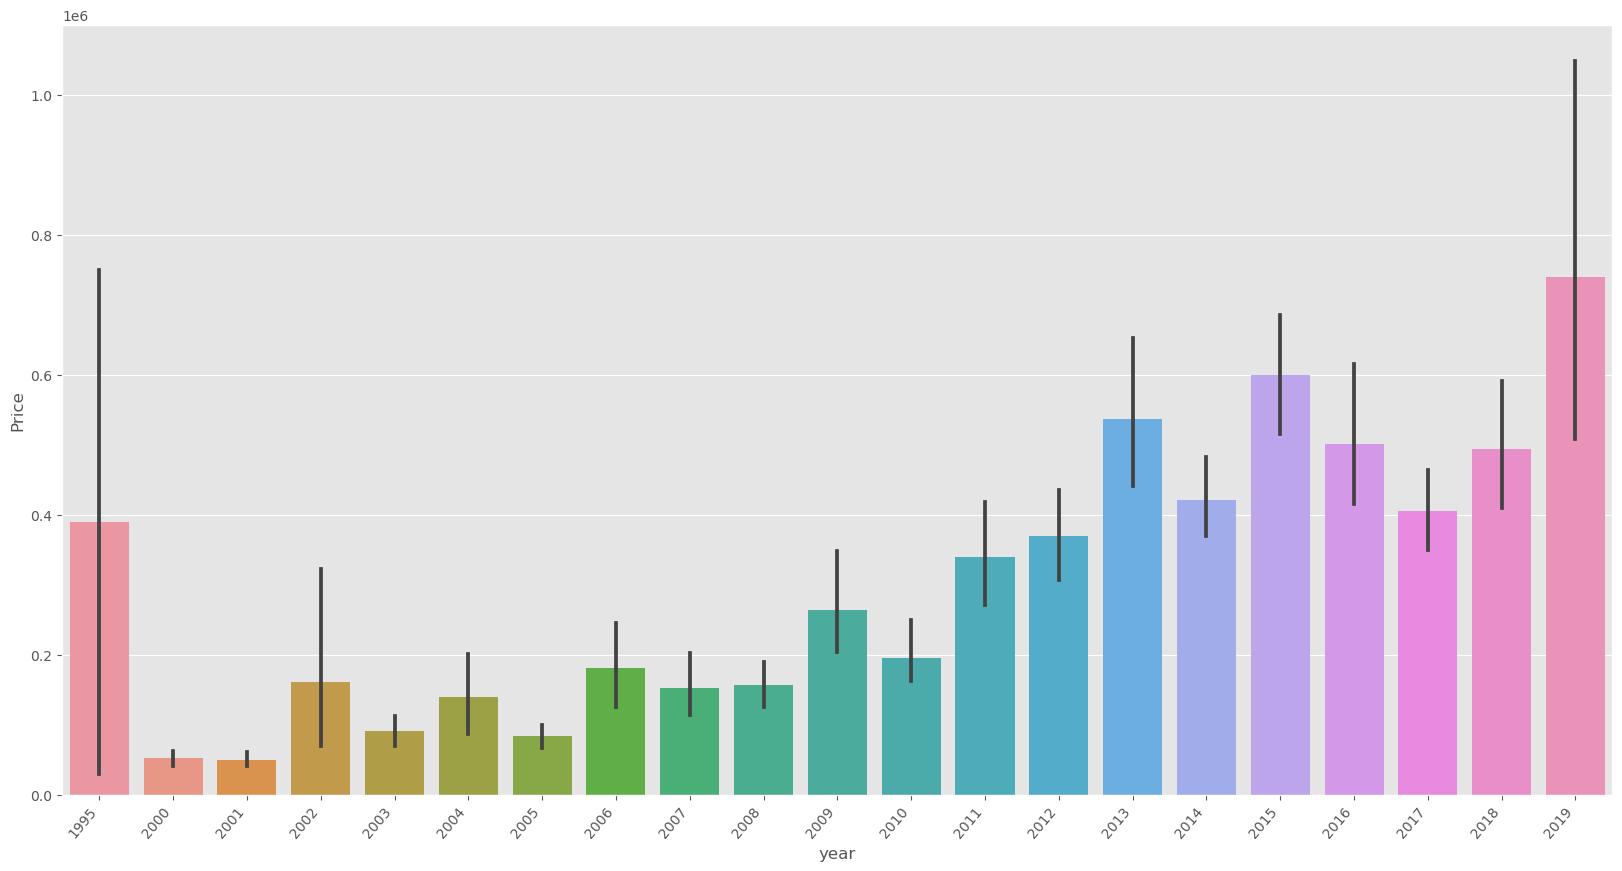

In [114]:
# relation of year with price
plt.subplots(figsize=(20,10))
ax = sns.barplot(x='year',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha = 'right')
plt.show()

C:\Users\sharm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


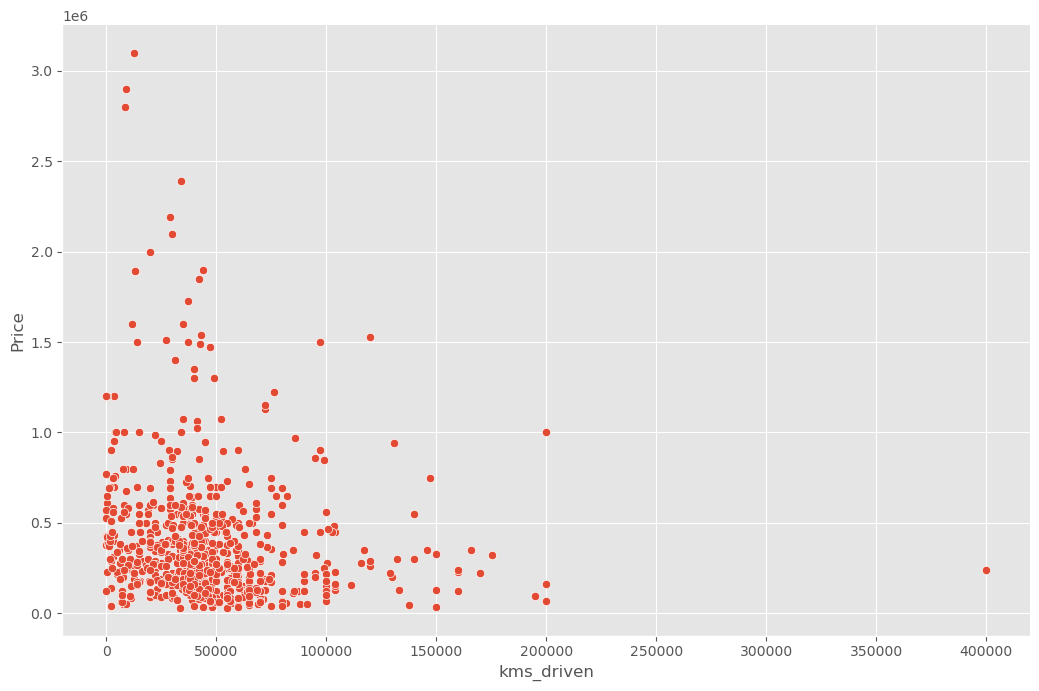

In [117]:
# Checking relationship of kms_driven with Prices
# The relplot function in Seaborn is used for creating relational plots. It provides a high-level interface for drawing relational plots onto a FacetGrid
sns.relplot(x='kms_driven',y='Price',data=df,height=7,aspect=1.5)

<Axes: xlabel='fuel_type', ylabel='Price'>

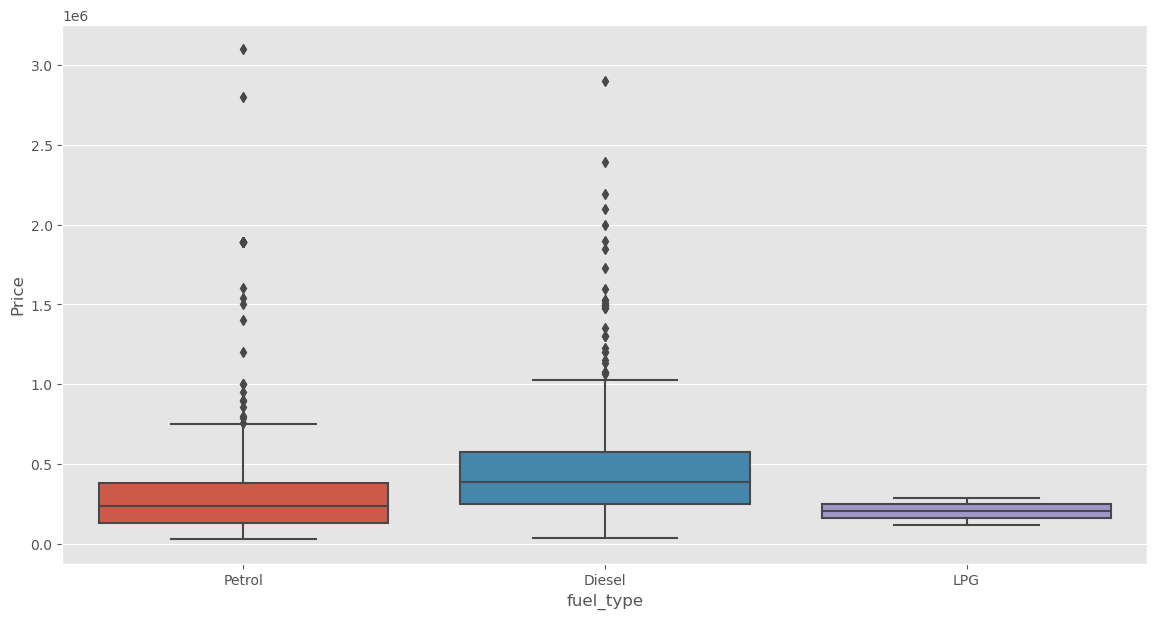

In [119]:
# Checking relationship of Fuel Type with Price
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=df)

C:\Users\sharm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


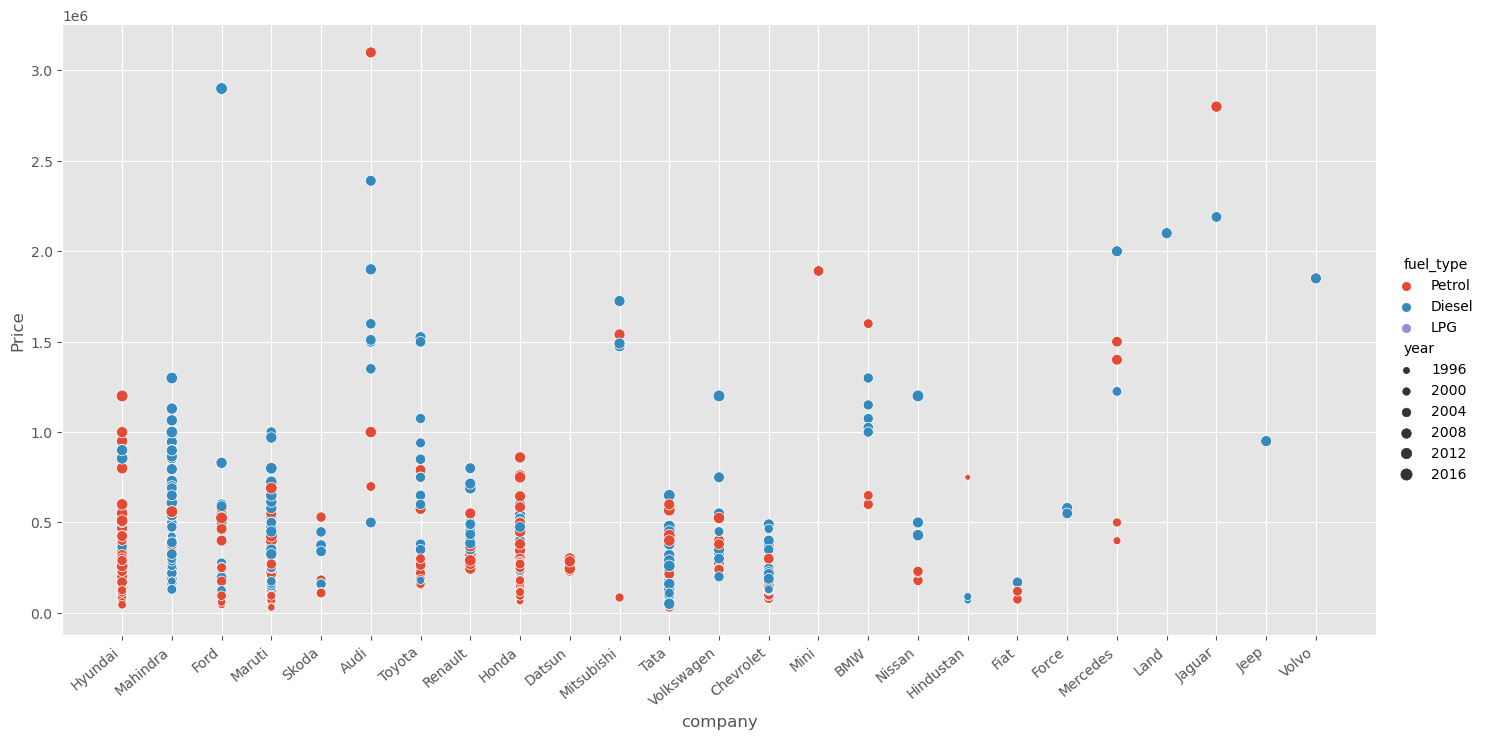

In [122]:
# Relationship of Price with FuelType, Year and Company mixed
ax=sns.relplot(x='company',y='Price',data=df,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')
plt.show()

# train_test_split

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Price',axis =1)
                                               ,df['Price'],test_size=0.2,
                                                   random_state = 2)

In [137]:
X_test

,name,company,year,kms_driven,fuel_type
396,Hyundai Grand i10,Hyundai,2016,59910,Diesel
759,Maruti Suzuki Dzire,Maruti,2009,42000,Petrol
109,Ford Figo Diesel,Ford,2014,50000,Diesel
295,Ford EcoSport Titanium,Ford,2014,57000,Diesel
15,Audi Q7,Audi,2014,16934,Diesel
...,...,...,...,...,...
185,Maruti Suzuki Zen,Maruti,2000,60000,Petrol
267,Maruti Suzuki Maruti,Maruti,2003,56758,Petrol
499,Mahindra Scorpio Vlx,Mahindra,2013,75000,Diesel
317,Mahindra Scorpio,Mahindra,2013,68000,Diesel


In [173]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Create a ColumnTransformer
transformer = ColumnTransformer(
    transformers=[
        ('tf1', encoder, ['name', 'company', 'fuel_type']),
    ],
    remainder='passthrough'
)

# Create a pipeline with Linear Regression
lr = LinearRegression()
pipe = make_pipeline(transformer, lr)

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)


In [175]:
y_pred = pipe.predict(X_test)


In [176]:
r2_score(y_test,y_pred)

-2081580748589.149

In [187]:
X=df[['name','company','year','kms_driven','fuel_type']]
y=df['Price']
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(transformer,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [188]:
np.argmax(scores)

511

In [189]:
scores[np.argmax(scores)]

0.9131661561556583

In [190]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([405353.35546875])

In [192]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(transformer,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9131661561556583

In [193]:
import pickle
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [194]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([420566.74611226])

In [195]:
pipe.steps[0][1].transformers[0][1].categories[0]

'a'